In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

In [9]:
file_path = "HR-Employee-Attrition.csv"
df = pd.read_csv(file_path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
534,53,No,Travel_Rarely,970,Research & Development,7,3,Life Sciences,1,730,...,3,80,0,32,3,3,5,1,1,3
58,31,No,Travel_Rarely,655,Research & Development,7,4,Life Sciences,1,76,...,4,80,1,10,3,2,7,7,1,7
255,25,No,Travel_Rarely,685,Research & Development,1,3,Life Sciences,1,350,...,4,80,2,5,3,3,4,2,1,2
543,44,No,Non-Travel,381,Research & Development,24,3,Medical,1,744,...,3,80,0,9,5,3,5,2,1,4
1260,32,No,Non-Travel,953,Research & Development,5,4,Technical Degree,1,1764,...,2,80,0,12,3,3,7,7,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,33,Yes,Travel_Rarely,603,Sales,9,4,Marketing,1,1157,...,1,80,0,6,3,3,5,2,0,3
477,50,No,Travel_Frequently,1246,Human Resources,3,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
926,43,No,Travel_Rarely,531,Sales,4,4,Marketing,1,1293,...,4,80,0,23,3,4,21,7,15,17
1097,24,No,Travel_Rarely,350,Research & Development,21,2,Technical Degree,1,1551,...,2,80,3,2,3,3,1,1,0,0


In [8]:
print("Dataset Shape :",df.shape)

Dataset Shape : (1470, 35)


In [10]:
print("Missing Values :",df.isnull().sum())

Missing Values : Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

In [10]:
print("Duplicated Rows :",df.duplicated().sum())

Duplicated Rows : 0


In [12]:
print("Data Types :",df.dtypes)

Data Types : Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWo

In [14]:
df.drop(columns = ["EmployeeCount", "StandardHours", "Over18"],inplace = True)

In [16]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns

# Display unique values for each categorical column
for col in categorical_cols:
    print(f"{col} unique values: {df[col].unique()}\n")

Attrition unique values: ['Yes' 'No']

BusinessTravel unique values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department unique values: ['Sales' 'Research & Development' 'Human Resources']

EducationField unique values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender unique values: ['Female' 'Male']

JobRole unique values: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus unique values: ['Single' 'Married' 'Divorced']

OverTime unique values: ['Yes' 'No']



In [18]:
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


/var/folders/q_/pkdfgrtj10d38gtbs978d6yh0000gn/T/ipykernel_1262/3098914763.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Attrition", palette="Set2")


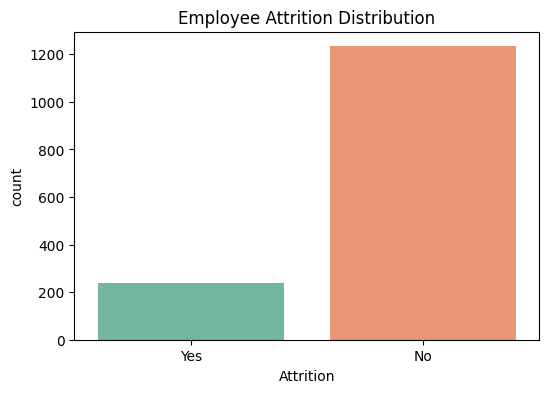

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot count of Attrition (Yes/No)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Attrition", palette="Set2")
plt.title("Employee Attrition Distribution")
plt.show()

# Check percentage distribution
attrition_rate = df["Attrition"].value_counts(normalize=True) * 100
print(attrition_rate)

/var/folders/q_/pkdfgrtj10d38gtbs978d6yh0000gn/T/ipykernel_1262/561989668.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette=['blue', 'red'])


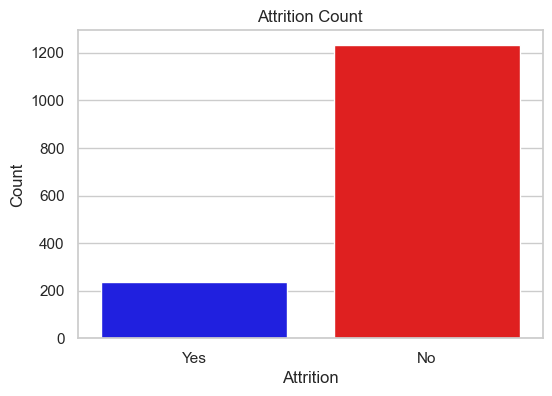

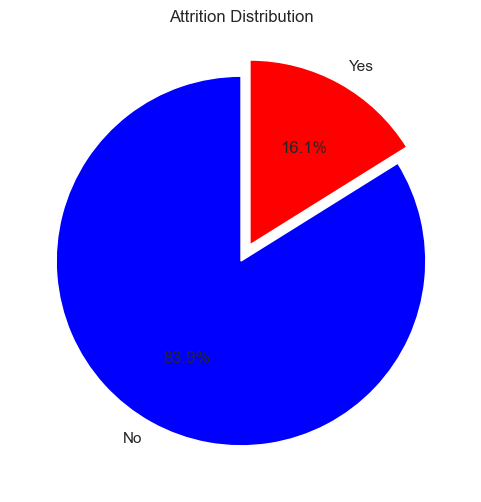

In [24]:
# Countplot for Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df, palette=['blue', 'red'])
plt.title('Attrition Count')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

# Pie chart for Attrition distribution
plt.figure(figsize=(6, 6))
df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%', colors=['blue', 'red'], startangle=90, explode=[0, 0.1])
plt.title('Attrition Distribution')
plt.ylabel('')
plt.show()

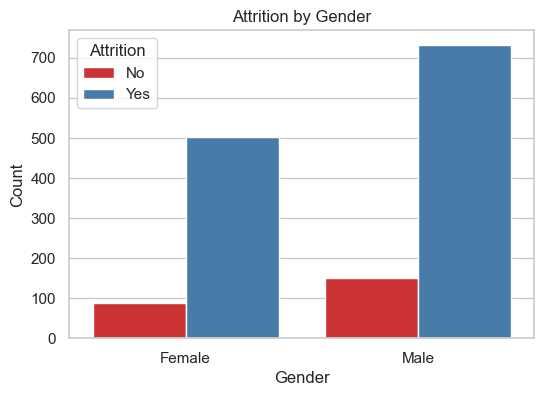

In [26]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for Seaborn plots
sns.set_style("whitegrid")

# Create a count plot for Gender vs Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", hue="Attrition", data=df, palette="Set1")

# Add labels and title
plt.title("Attrition by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=['No', 'Yes'])

# Show the plot
plt.show()

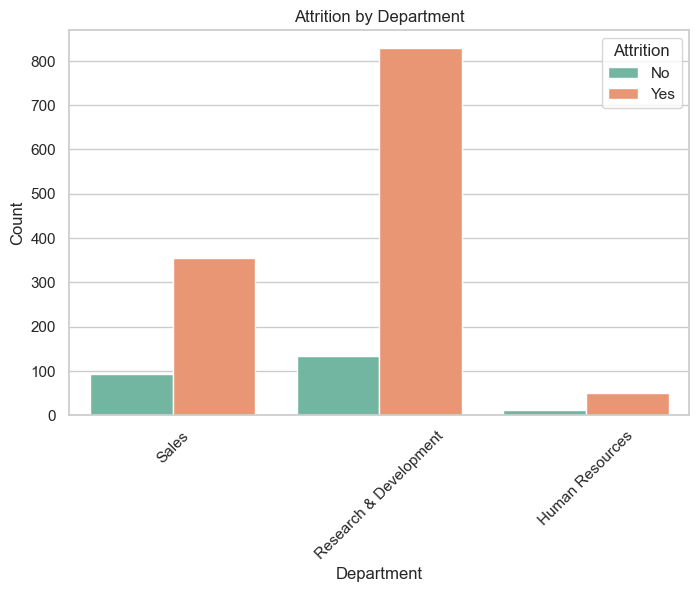

In [28]:
# Create a count plot for Department vs Attrition
plt.figure(figsize=(8, 5))
sns.countplot(x="Department", hue="Attrition", data=df, palette="Set2")

# Add labels and title
plt.title("Attrition by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=['No', 'Yes'])
plt.xticks(rotation=45)  # Rotate labels for better readability

# Show the plot
plt.show()

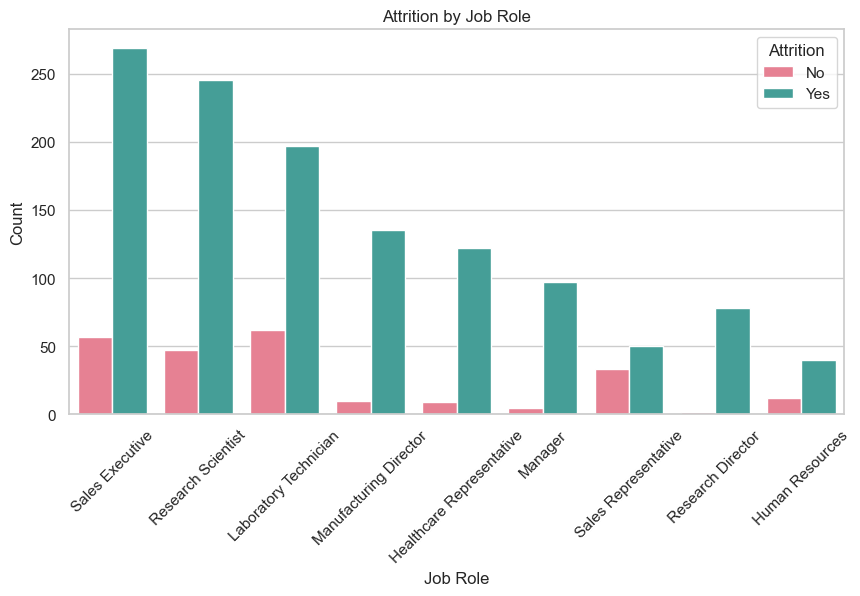

In [30]:
# Create a count plot for Job Role vs Attrition
plt.figure(figsize=(10, 5))
sns.countplot(x="JobRole", hue="Attrition", data=df, palette="husl")

# Add labels and title
plt.title("Attrition by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=['No', 'Yes'])
plt.xticks(rotation=45)  # Rotate labels for better visibility

# Show the plot
plt.show()

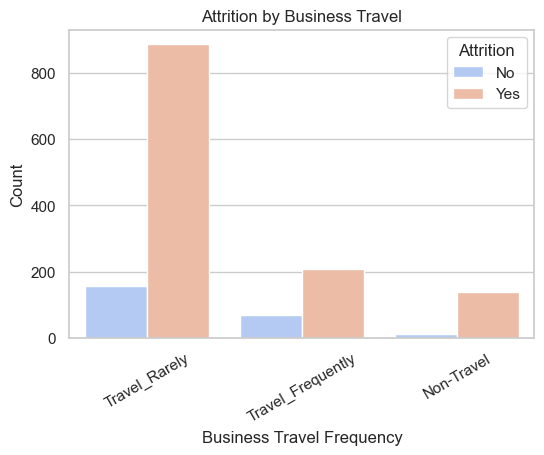

In [32]:
# Create a count plot for Business Travel vs Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x="BusinessTravel", hue="Attrition", data=df, palette="coolwarm")

# Add labels and title
plt.title("Attrition by Business Travel")
plt.xlabel("Business Travel Frequency")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=['No', 'Yes'])
plt.xticks(rotation=30)  # Rotate labels for better readability

# Show the plot
plt.show()

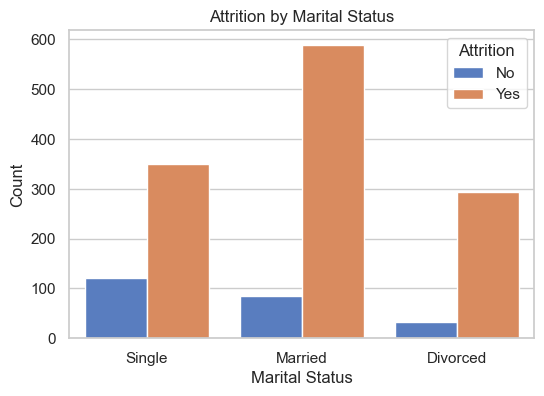

In [34]:
# Create a count plot for Marital Status vs Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x="MaritalStatus", hue="Attrition", data=df, palette="muted")

# Add labels and title
plt.title("Attrition by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=['No', 'Yes'])

# Show the plot
plt.show()

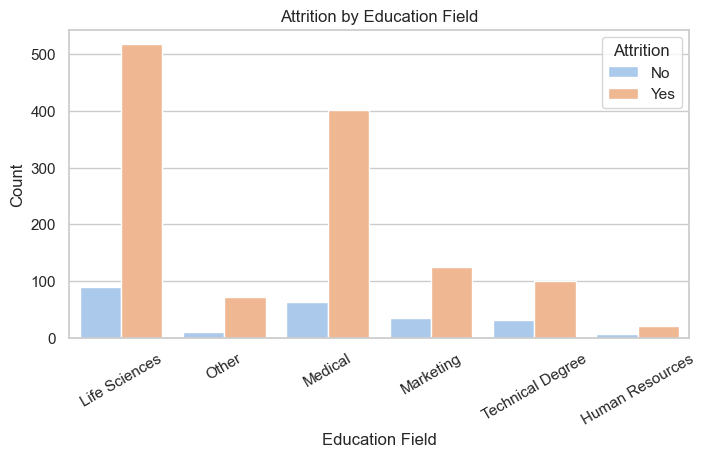

In [36]:
# Count plot for Education Field vs Attrition
plt.figure(figsize=(8, 4))
sns.countplot(x="EducationField", hue="Attrition", data=df, palette="pastel")

# Labels and title
plt.title("Attrition by Education Field")
plt.xlabel("Education Field")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=['No', 'Yes'])
plt.xticks(rotation=30)

# Show plot
plt.show()

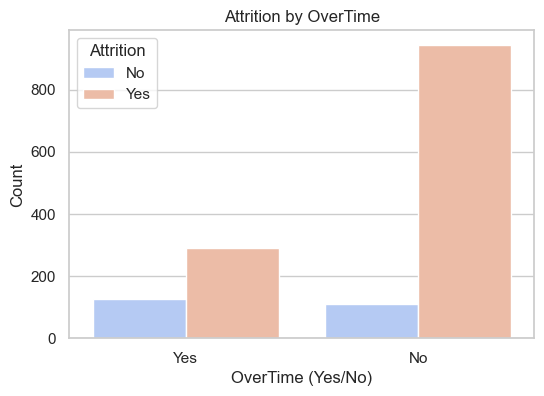

In [38]:
# Count plot for OverTime vs Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x="OverTime", hue="Attrition", data=df, palette="coolwarm")

# Labels and title
plt.title("Attrition by OverTime")
plt.xlabel("OverTime (Yes/No)")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=['No', 'Yes'])

# Show plot
plt.show()

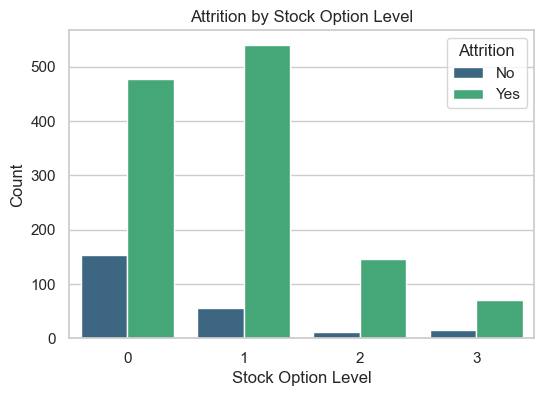

In [40]:
# Count plot for Stock Option Level vs Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x="StockOptionLevel", hue="Attrition", data=df, palette="viridis")

# Labels and title
plt.title("Attrition by Stock Option Level")
plt.xlabel("Stock Option Level")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=['No', 'Yes'])

# Show plot
plt.show()

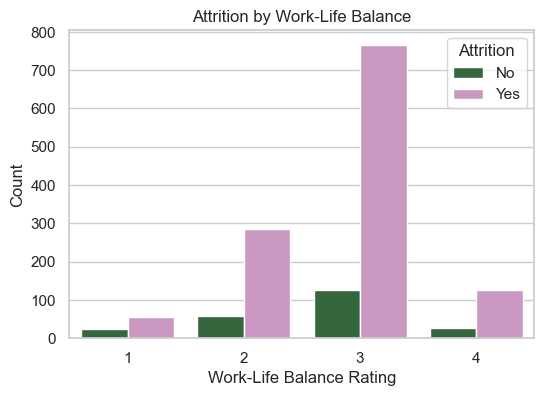

In [42]:
# Count plot for Work-Life Balance vs Attrition
plt.figure(figsize=(6, 4))
sns.countplot(x="WorkLifeBalance", hue="Attrition", data=df, palette="cubehelix")

# Labels and title
plt.title("Attrition by Work-Life Balance")
plt.xlabel("Work-Life Balance Rating")
plt.ylabel("Count")
plt.legend(title="Attrition", labels=['No', 'Yes'])

# Show plot
plt.show()

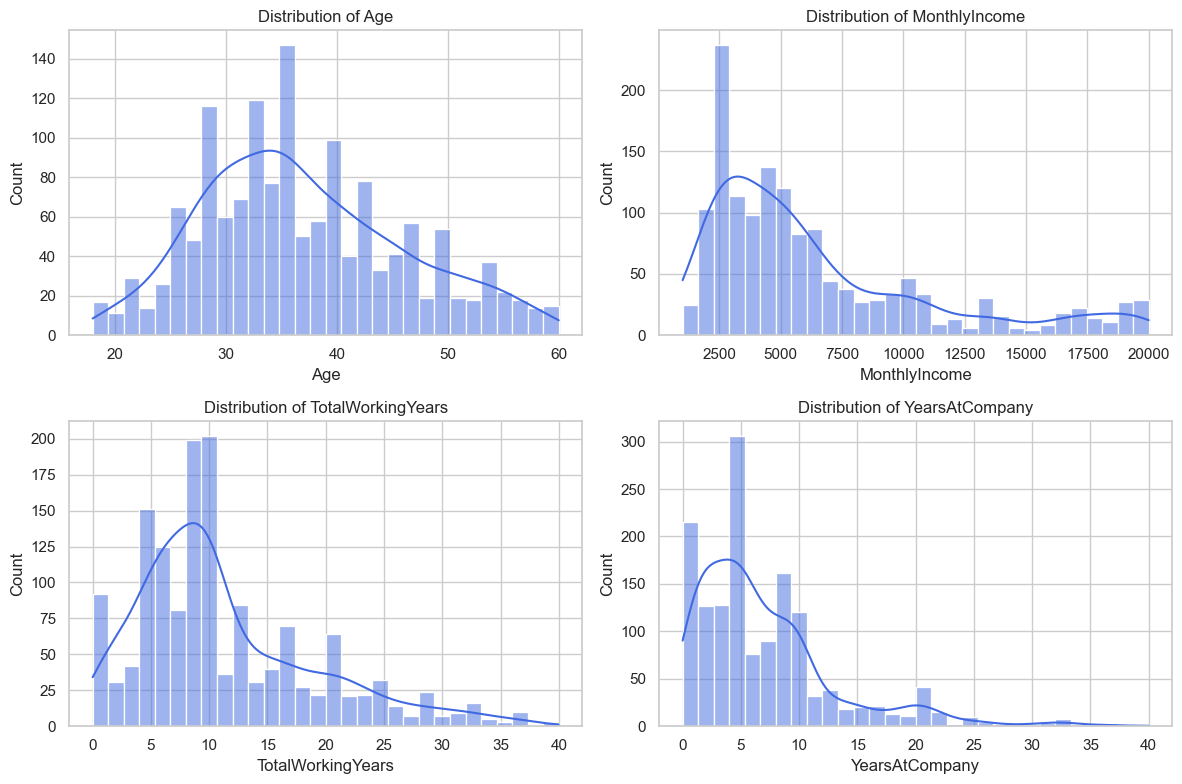

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for visualization
numerical_features = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']

# Set plot size
plt.figure(figsize=(12, 8))

# Generate histograms for each numerical feature
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 subplot
    sns.histplot(data=df, x=feature, kde=True, bins=30, color='royalblue')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

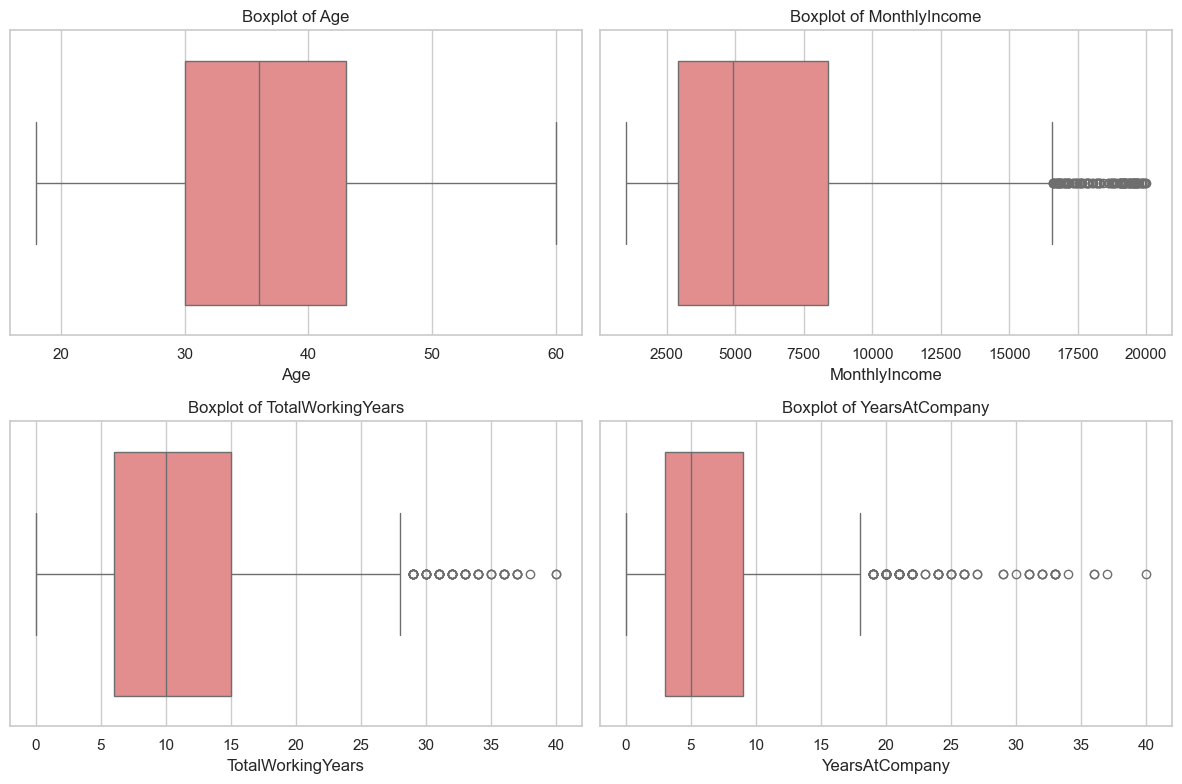

In [46]:
# Creating box plots for numerical features
plt.figure(figsize=(12, 8))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=feature, color='lightcoral')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

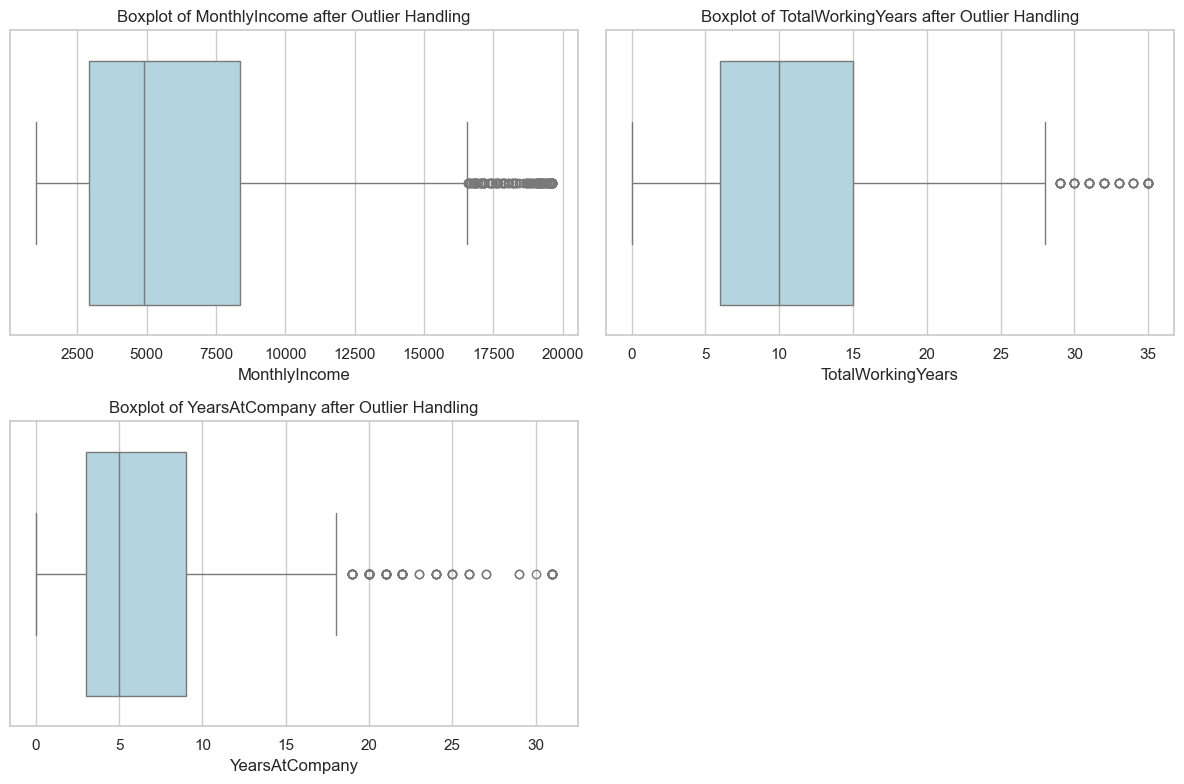

In [48]:
# Define a function to cap outliers
def cap_outliers(df, column):
    upper_limit = df[column].quantile(0.99)  # Set upper bound at 99th percentile
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])  # Cap values
    return df

# Apply capping to relevant numerical columns
outlier_columns = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']
for col in outlier_columns:
    df = cap_outliers(df, col)

# Verify changes with new boxplots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(outlier_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=feature, color='lightblue')
    plt.title(f'Boxplot of {feature} after Outlier Handling')

plt.tight_layout()
plt.show()

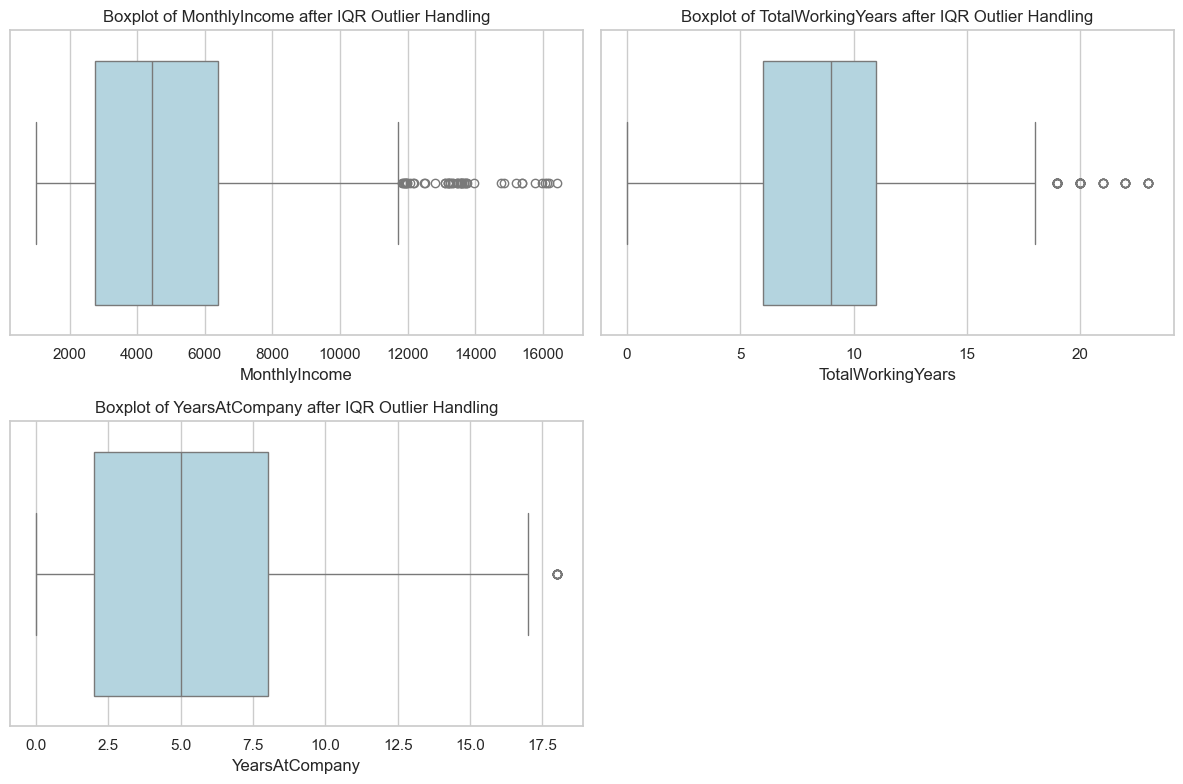

In [50]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower limit
    upper_bound = Q3 + 1.5 * IQR  # Upper limit

    # Removing outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply to the three columns
for col in outlier_columns:
    df = remove_outliers_iqr(df, col)

# Re-check with boxplots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(outlier_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=feature, color='lightblue')
    plt.title(f'Boxplot of {feature} after IQR Outlier Handling')

plt.tight_layout()
plt.show()

In [14]:
# Convert 'Attrition' to numeric (Yes=1, No=0)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Convert other categorical columns using Label Encoding (if necessary)
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 
                    'JobRole', 'MaritalStatus', 'OverTime']

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [18]:
for col in categorical_cols:
    print(f"{col} unique values: {df[col].unique()}")

BusinessTravel unique values: [2 1 0]
Department unique values: [2 1 0]
EducationField unique values: [1 4 3 2 5 0]
Gender unique values: [0 1]
JobRole unique values: [7 6 2 4 0 3 8 5 1]
MaritalStatus unique values: [2 1 0]
OverTime unique values: [1 0]


In [26]:
df = df.apply(lambda col: pd.factorize(col)[0] if col.dtype == 'object' else col)

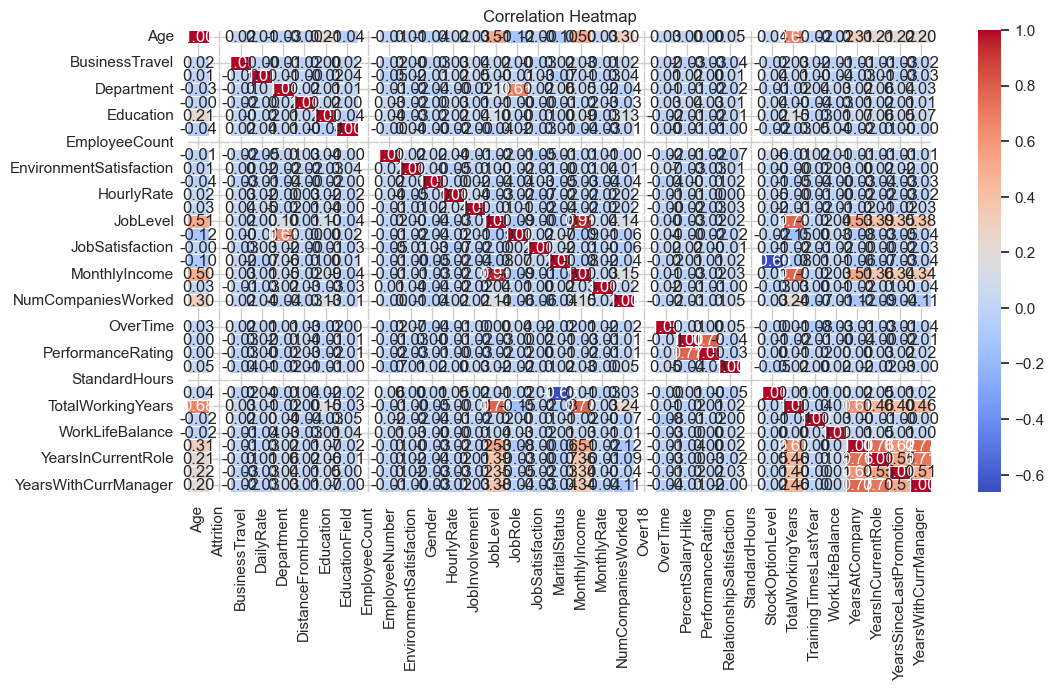

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()